In [2]:
#HOMEWORK NO. 7

#1. OPENING the folder where are my emails

import os

folder = 'allen_p_sent_emails'
filepaths = [os.path.join(folder, f) for f in os.listdir(folder)]

In [3]:
#2. GETTING IT Statistics of the folder with its files
os.stat('allen_p_sent_emails')

os.stat_result(st_mode=16895, st_ino=1407374884315822, st_dev=3963269379, st_nlink=1, st_uid=0, st_gid=0, st_size=16384, st_atime=1603041107, st_mtime=1603041058, st_ctime=1603041003)

In [4]:
#3. ANALYZING the emails metadata
#From 0-99 about files and 100 about the folder

!pip install folderstats
import folderstats
df = folderstats.folderstats('allen_p_sent_emails', hash_name='md5', ignore_hidden=True)
df

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,md5
0,2,allen_p_sent_emails\1.txt,1,txt,510,2020-10-18 10:10:58,2020-10-18 10:10:58,2020-10-18 10:10:58,False,NaN,0,1,0,f7741cbc849aca39383ba8067f5153d2
1,3,allen_p_sent_emails\10.txt,10,txt,1297,2020-10-18 10:10:57,2020-10-18 10:10:57,2020-10-18 10:10:57,False,NaN,0,1,0,7abef0f99a9b7ea3f51c080e44497a7b
2,4,allen_p_sent_emails\100.txt,100,txt,478,2020-10-18 10:10:58,2020-10-18 10:10:58,2020-10-18 10:10:58,False,NaN,0,1,0,0655816eb9718873fa6c8c6ea53c3e45
3,5,allen_p_sent_emails\11.txt,11,txt,653,2020-10-18 10:10:57,2020-10-18 10:10:57,2020-10-18 10:10:57,False,NaN,0,1,0,4081270d85688caf46a6cdc7ecd8b447
4,6,allen_p_sent_emails\12.txt,12,txt,939,2020-10-18 10:10:57,2020-10-18 10:10:57,2020-10-18 10:10:57,False,NaN,0,1,0,8ef46c2e42f04408de07d1b61bdf2eef
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,98,allen_p_sent_emails\96.txt,96,txt,537,2020-10-18 10:10:58,2020-10-18 10:10:58,2020-10-18 10:10:58,False,NaN,0,1,0,51500585e43460b48337d2fdfb8b7b45
97,99,allen_p_sent_emails\97.txt,97,txt,807,2020-10-18 10:10:58,2020-10-18 10:10:58,2020-10-18 10:10:58,False,NaN,0,1,0,a9db97a6a1c98b6cb1270c4d4007ff72
98,100,allen_p_sent_emails\98.txt,98,txt,734,2020-10-18 10:10:58,2020-10-18 10:10:58,2020-10-18 10:10:58,False,NaN,0,1,0,de3995c8b650bd60d796ef987365237b
99,101,allen_p_sent_emails\99.txt,99,txt,712,2020-10-18 10:10:58,2020-10-18 10:10:58,2020-10-18 10:10:58,False,NaN,0,1,0,61bb46b4e16b08d5e8bb88cc9477abb0


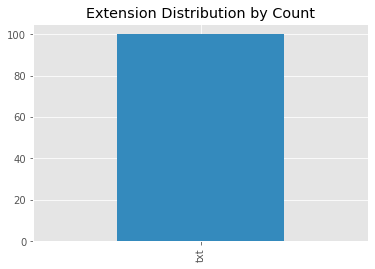

In [5]:
#4. ANALYZING files by extension.  In this example, all emails are in .txt extension
import matplotlib.pyplot as plt

with plt.style.context('ggplot'):
    df['extension'].value_counts().plot(
        kind='bar', color='C1', title='Extension Distribution by Count');

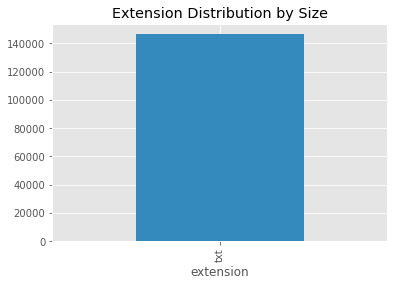

In [6]:
#5. ANALYZING the size per file extension.  In this case the whole size correspond to .txt files
with plt.style.context('ggplot'):
    # Group by extension and sum all sizes for each extension 
    extension_sizes = df.groupby('extension')['size'].sum()
    # Sort elements by size
    extension_sizes = extension_sizes.sort_values(ascending=False)
    
    extension_sizes.plot(
        kind='bar', color='C1', title='Extension Distribution by Size');

In [7]:
#6. ANALIZING the files in terms of a network
#NODES equal to 100 files + 1 folder = 101
#EDGES equal files inside the folder = 100

import networkx as nx

# Sort the index
df_sorted = df.sort_values(by='id')

G = nx.Graph()
for i, row in df_sorted.iterrows():
    if row.parent:
        G.add_edge(row.id, row.parent)
    
# Print some additional information
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 101
Number of edges: 100
Average degree:   1.9802


In [8]:
#7. AFTER analyzing metadata, this snip opens the heads of the emails
# For this example, it's opening from email 94 to 100

folderpath = r"allen_p_sent_emails" # make sure to put the 'r' in front
filepaths  = [os.path.join(folderpath, name) for name in os.listdir(folderpath)]
all_files = []

for path in filepaths:
    with open(path, 'r') as f:
        file = f.readlines()
        all_files.append(file)

i = 94

while i < len(all_files):
    a_file = all_files[i]
    i = i+1
    for line in a_file[0:5]:
        print(line)


Message-ID: <30732006.1075855687344.JavaMail.evans@thyme>

Date: Tue, 24 Oct 2000 05:52:00 -0700 (PDT)

From: phillip.allen@enron.com

To: bob.m.hall@enron.com

Subject: 

Message-ID: <9467487.1075855687366.JavaMail.evans@thyme>

Date: Tue, 24 Oct 2000 05:16:00 -0700 (PDT)

From: phillip.allen@enron.com

To: rbandekow@home.com

Subject: Re: Enron

Message-ID: <4944629.1075855687387.JavaMail.evans@thyme>

Date: Mon, 23 Oct 2000 08:55:00 -0700 (PDT)

From: phillip.allen@enron.com

To: jedglick@hotmail.com

Subject: Enron

Message-ID: <23615201.1075855687408.JavaMail.evans@thyme>

Date: Fri, 20 Oct 2000 03:06:00 -0700 (PDT)

From: phillip.allen@enron.com

To: stagecoachmama@hotmail.com

Subject: 

Message-ID: <18861958.1075855687429.JavaMail.evans@thyme>

Date: Wed, 18 Oct 2000 07:44:00 -0700 (PDT)

From: phillip.allen@enron.com

To: bob.schorr@enron.com

Subject: Re: EOL Screens in new Body Shop

